# Stroop Effect Statistical Analysis
---

The purpose of this analysis is to compute descriptive statistics and perform a satistical test on a data set based on a psychological phenomenon, the Stroop Effect.

## Background Information
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:red">RED</span>, <span style="color:blue">BLUE</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:purple">PURPLE</span>, <span style="color:orange">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

### Libraries to use in the analysis

In [130]:
import pandas as pd
import math
import pprint as pp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Stroop Dataset
The following are a set results of the effect on 24 people.

In [131]:
#Load the results on a Pandas dataset
stroopData = pd.read_csv('stroopdata.csv')
#Print the results
pp.pprint(stroopData)

    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


## My personal test
The following are the results I had on the test (I am not native english)
My average results are 9.7/23.3s

In [132]:
#Load my results
myStroopData = pd.read_csv('mystroopdata.csv')

#Print the results and display some statistics
pp.pprint(myStroopData)
myStroopData.describe()

   Congruent  Incongruent
0      9.249       24.689
1     10.503       23.975
2      9.466       21.297


,Congruent,Incongruent
count,3.000000,3.000000
mean,9.739333,23.320333
std,0.670196,1.788255
min,9.249000,21.297000
25%,9.357500,22.636000
50%,9.466000,23.975000
75%,9.984500,24.332000
max,10.503000,24.689000


## Questions For Investigation
---

### 1. What is our independent variable? What is our dependent variable?
The independent variable that change is the fact that the color and word coincide. We could say the congruence. 
<br>
The dependent variable is the exercise resolution time. The time in pronunce all the word color.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform?
This analysis is over dependent samples (the subjects of study are the same) performing a *pre-test, post-test* study (first without applying the stroop effect and applying the effect after).
This t-statistical test of dependent samples will take the following assumptions:
* Scale of measurement. The applied scale is following a continuous or ordinal scale.
* Simple random sample. The data is collected from a randomly selected porcion of the total population.
* Normal distribution. The data is following a normal distribution curve.
* Sample size. The data is a reasonably large sample.

The first hypotheses (null hypotheses) will be that there are no differencies on the results.
<br> As alternative hypotheses, there will be a difference on the results, being the results less than the previous one.
<br>I will use a alpha level of 0.05.
<br>
<br>**H_0**: µ_c - µ_i = 0
<br>**H_a**: µ_c - µ_i /= 0
<br>**alpha** = 0.05

### 3. Descriptive statistics regarding this dataset

Following we have the mean, std, min and max for both phases (congruence and incongruence) and diferences.

In [133]:
print("Phase - Mean/StdDev/Min/Max (Seconds)")
print("Congruent   - {0:.4f}/{1:.4f}/{2:.4f}/{3:.4f}".format(
    stroopData['Congruent'].mean(), stroopData['Congruent'].std(),
    stroopData['Congruent'].min(), stroopData['Congruent'].max()))
print("Incongruent - {0:.4f}/{1:.4f}/{2:.4f}/{3:.4f}".format(
    stroopData['Incongruent'].mean(), stroopData['Incongruent'].std(),
    stroopData['Incongruent'].min(), stroopData['Incongruent'].max()))

dStroopData = stroopData['Incongruent'] - stroopData['Congruent']
print("Difference  - {0:.4f}/{1:.4f}/{2:.4f}/{3:.4f}".format(
    dStroopData.mean(), dStroopData.std(), dStroopData.min(), dStroopData.max()))

Phase - Mean/StdDev/Min/Max (Seconds)
Congruent   - 14.0511/3.5594/8.6300/22.3280
Incongruent - 22.0159/4.7971/15.6870/35.2550
Difference  - 7.9648/4.8648/1.9500/21.9190


### 4. Visualizations that show the distribution of the sample data.

The following graph compares the results of both test (Congruent, Incongruent) and the difference value (Incongruent - Congruent) between them.
It is clear that all values of the incongruent way are bigger than congruent one.

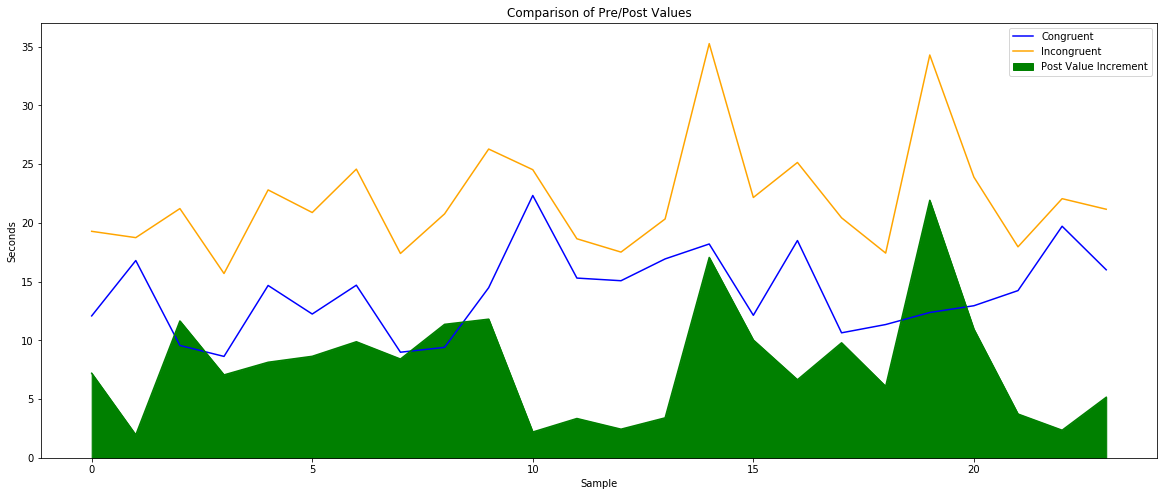

In [134]:
stroopData['Congruent'].plot.line(color='blue', label='Congruent', figsize=(20,8))
stroopData['Incongruent'].plot.line(color='orange', label='Incongruent', figsize=(20,8))
dStroopData.plot.area(color='green', label="Post Value Increment", figsize=(20,8))
plt.legend()
plt.title("Comparison of Pre/Post Values")
plt.xlabel("Sample")
plt.ylabel("Seconds")
plt.show()

The following compares in a histogram graph the frequency of results.
It is clear also than the incongruent test increase the time result.

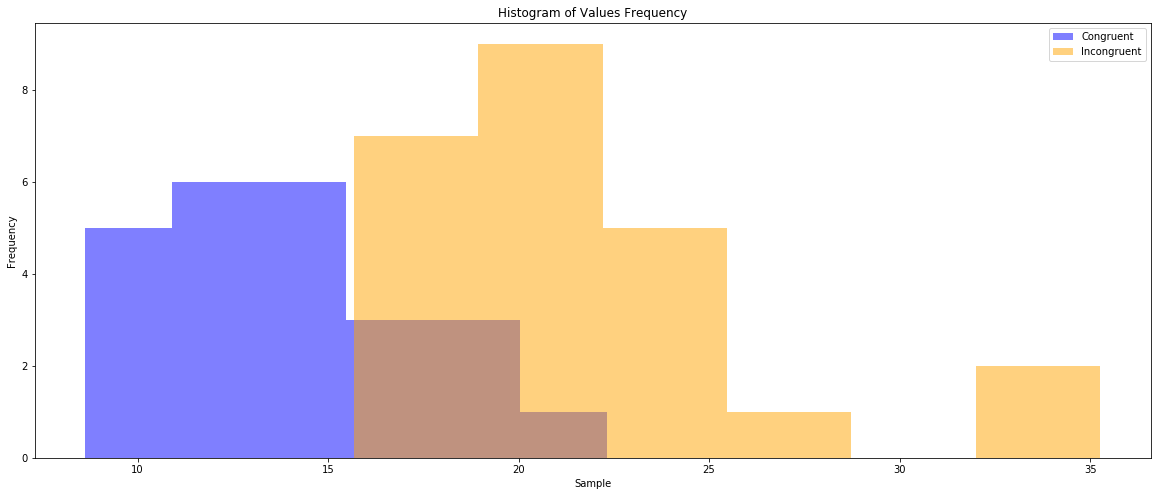

In [135]:
stroopData['Congruent'].plot.hist(bins=6, alpha=0.5, color='blue', label='Congruent', figsize=(20,8))
stroopData['Incongruent'].plot.hist(bins=6, alpha=0.5, color='orange', label='Incongruent', figsize=(20,8))
plt.legend()
plt.title("Histogram of Values Frequency")
plt.xlabel("Sample")
plt.show()


### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

A confidence level of 95% (one tailed) will be used.
<br>Then the t critical values using a 23 degrees if freedom is 1.714

In [136]:
# Calculate the mean difference
dMean = dStroopData.mean()
print ("Mean Difference {0:.4f}".format(dMean))

# Calculate std difference
dStd = dStroopData.std()
print ("Std Difference {0:.4f}".format(dMean))

# Calculate standart error (SEM)
dSEM = dStroopData.std()/math.sqrt(24)
print ("SEM Difference {0:.4f}".format(dSEM))

# Calculate t-Statistic
dt = dMean/dSEM
print ("t-Statistic Difference {0:.4f}".format(dt))

# Calculate cohen's d
cd = dMean/dStd
print ("Cohen's D {0:.4f}".format(cd))

# Calculate r^2
r2 = math.pow(dt,2)/(math.pow(dt,2)+23)
print ("R^2 {0:.4f}".format(r2))

Mean Difference 7.9648
Std Difference 7.9648
SEM Difference 0.9930
t-Statistic Difference 8.0207
Cohen's D 1.6372
R^2 0.7366


The t-Statictic (8.0207) is bigger than the t critical value (1.714) for our confidence level of 95%
<br>Then we can conclude that the null hypothesis (and accept the alternate hypotesis) is rejected because the stroop effect has a statistical significance on the results.
<br>Using the r^2 we can to determinate that the stroop effect produce a variation of 73.66% on the time result.

### 6. What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect?

This effect is partly due to the fact that the information processed in our brain is processed by two independent "circuits" that when entering into conflict produce a delay that must be interpreted logically.
<br>Similar situations can be produced when we count when we see or hear other numbers simultaneously or simply when we are interrupted while thinking.
<br>We are not prepared for the concurrence!

## References
---
Wikipedia info about Stroop Effect<br>
https://en.wikipedia.org/wiki/Stroop_effect
<br>
Guide and dataset for the analysis<br>
https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True
<br>
Online Stroop Effect Test<br>
https://faculty.washington.edu/chudler/java/ready.html
<br>
Assumptions on t-test
<br>https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp